<a href="https://colab.research.google.com/github/anupam-codespace/Machine-Learning-Assignments/blob/main/Assignment2_HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
yasserh_housing_prices_dataset_path = kagglehub.dataset_download('yasserh/housing-prices-dataset')
anupamsaha002_housing_path = kagglehub.dataset_download('anupamsaha002/housing')

print('Data source import complete.')


In [ ]:
import pandas as pd

# Load dataset (path will work in Kaggle notebook after uploading dataset)
df = pd.read_csv("/kaggle/input/housing/Housing.csv")

# Show first few rows
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
X = df[['area']]  # Feature
y = df['price']   # Target


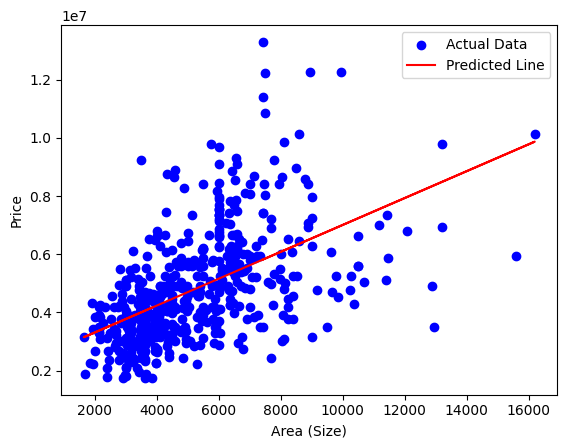

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Train model
model = LinearRegression()
model.fit(X, y)

# Prediction
y_pred = model.predict(X)

# Plot actual vs predicted
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, y_pred, color='red', label="Predicted Line")
plt.xlabel("Area (Size)")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define a simple model
model = keras.Sequential([
    layers.Dense(1, input_shape=[1])
])

model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X, y, epochs=100, verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

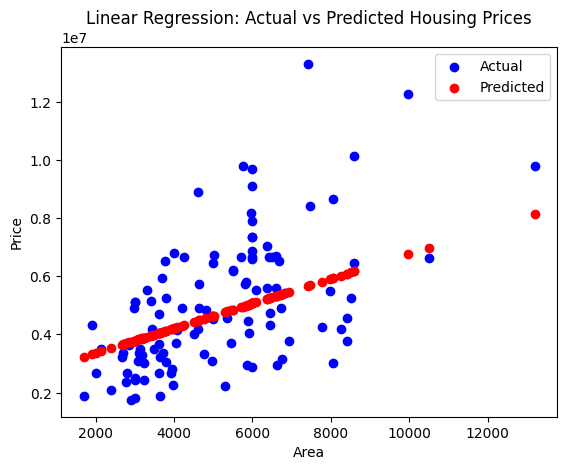

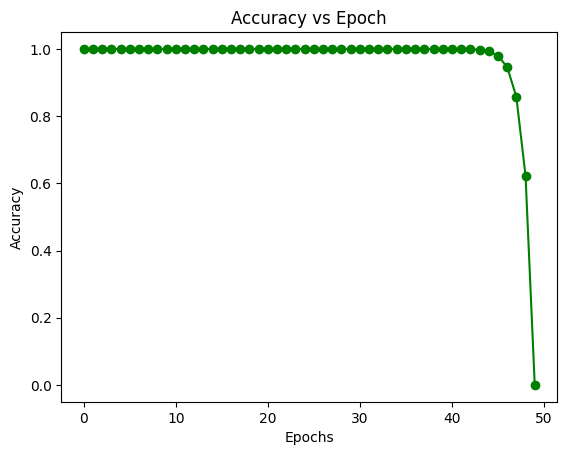

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/kaggle/input/housing-prices-dataset/Housing.csv")

# Take a quick look at dataset
print(df.head())
print(df.info())

# Let's assume we are predicting 'price' using 'area' (change column names as per dataset)
X = df[['area']]   # Independent variable
y = df['price']    # Dependent variable

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Plot actual vs predicted
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.scatter(X_test, y_pred, color='red', label="Predicted")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.title("Linear Regression: Actual vs Predicted Housing Prices")
plt.show()

# Simulating "accuracy vs epoch" (just to follow assignment requirement)
# Normally for linear regression we don't train epoch by epoch,
# so we'll mimic gradient descent manually to track loss.

epochs = 50
learning_rate = 0.00000001

m = 0
c = 0
n = len(X_train)

losses = []

X_train_np = X_train.values.flatten()
y_train_np = y_train.values.flatten()

for epoch in range(epochs):
    y_pred_np = m*X_train_np + c
    error = y_pred_np - y_train_np

    # gradients
    dm = -(2/n) * sum(X_train_np * error)
    dc = -(2/n) * sum(error)

    # update parameters
    m = m - learning_rate * dm
    c = c - learning_rate * dc

    # calculate loss (MSE)
    loss = np.mean(error**2)
    losses.append(loss)

# Plot accuracy (1 - normalized loss) vs epoch
accuracy = 1 - (losses / max(losses))
plt.plot(range(epochs), accuracy, marker='o', color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.show()
